Fitted parameters:
Lognormal: A = -126.43851399455293, mu = -1476.9196625303243, sigma = 143.08015373253852
Gaussian 1: A = -5.1210657881683054e-08, mu = 400.15104098385694, sigma = -16.125522888712258
Gaussian 2: A = 2.650485901168885e-06, mu = 516.345647456737, sigma = -33.653358672064286
Gaussian 3: A = 2.5430866716687985e-06, mu = 554.7739272213142, sigma = 50.21653763508022
Gaussian 4: A = 6.877044629413773e-07, mu = 597.9592956369852, sigma = 106.97680382580326
Gaussian 5: A = -4.2748723691575735e-08, mu = 363.04671929802515, sigma = 30.58959352958605


/tmp/ipykernel_424099/4186332398.py:49: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(combined_model, xdata, ydata, p0=p0)


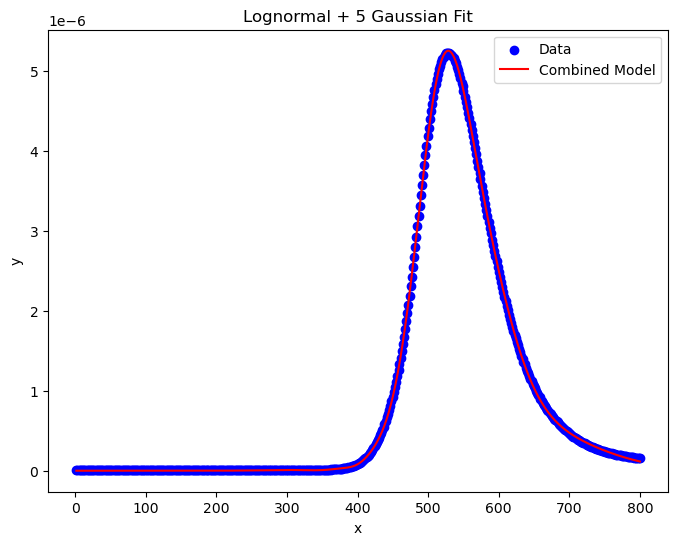

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


data = np.genfromtxt('./data2.dat')

# ログノーマル関数の定義
def lognormal(x, A, mu, sigma):
    return A / (x * sigma * np.sqrt(2 * np.pi)) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

# ガウス関数の定義
def gaussian(x, A, mu, sigma):
    return A * np.exp(- (x - mu)**2 / (2 * sigma**2))

# ログノーマル + 5つのガウスモデルの組み合わせ
def combined_model(x, A_log, mu_log, sigma_log,
                     A1, mu1, sigma1,
                     A2, mu2, sigma2,
                     A3, mu3, sigma3,
                     A4, mu4, sigma4,
                     A5, mu5, sigma5):
    """
    モデル関数: ログノーマル + 5つのガウス関数の線形結合
    """
    lognorm = lognormal(x, A_log, mu_log, sigma_log)
    gauss1 = gaussian(x, A1, mu1, sigma1)
    gauss2 = gaussian(x, A2, mu2, sigma2)
    gauss3 = gaussian(x, A3, mu3, sigma3)
    gauss4 = gaussian(x, A4, mu4, sigma4)
    gauss5 = gaussian(x, A5, mu5, sigma5)
    
    return lognorm + gauss1 + gauss2 + gauss3 + gauss4 + gauss5


xdata = np.array(data[:, 0])
ydata = np.array(data[:, 1])

# フィッティング
# 初期値の設定
p0 = [1, np.log(np.mean(xdata)), 1,  # ログノーマルの初期値
      1, np.mean(xdata), 1,  # 1つ目のガウス
      1, np.mean(xdata)*1.2, 1,  # 2つ目のガウス
      1, np.mean(xdata)*1.4, 1,  # 3つ目のガウス
      1, np.mean(xdata)*1.6, 1,  # 4つ目のガウス
      1, np.mean(xdata)*0.8, 1]  # 5つ目のガウス

# curve_fitを用いて最適化
popt, pcov = curve_fit(combined_model, xdata, ydata, p0=p0)

# 最適化結果の表示
A_log, mu_log, sigma_log, A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3, A4, mu4, sigma4, A5, mu5, sigma5 = popt
print("Fitted parameters:")
print(f"Lognormal: A = {A_log}, mu = {mu_log}, sigma = {sigma_log}")
print(f"Gaussian 1: A = {A1}, mu = {mu1}, sigma = {sigma1}")
print(f"Gaussian 2: A = {A2}, mu = {mu2}, sigma = {sigma2}")
print(f"Gaussian 3: A = {A3}, mu = {mu3}, sigma = {sigma3}")
print(f"Gaussian 4: A = {A4}, mu = {mu4}, sigma = {sigma4}")
print(f"Gaussian 5: A = {A5}, mu = {mu5}, sigma = {sigma5}")

# プロット用のデータ生成
x_fit = np.linspace(min(xdata), max(xdata), 1000)
y_fit = combined_model(x_fit, *popt)

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(xdata, ydata, label="Data", color="blue")
plt.plot(x_fit, y_fit, label="Combined Model", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Lognormal + 5 Gaussian Fit")
plt.show()

Fitted parameters:
Gaussian 1: A = -5.12293738967571e-08, mu = 400.1437282790304, sigma = 16.129383470646058
Gaussian 2: A = 2.6504647197484344e-06, mu = 516.3456719070901, sigma = -33.65332459758812
Gaussian 3: A = 2.543110709228831e-06, mu = 554.7735467158126, sigma = 50.216767476505645
Gaussian 4: A = 6.876949732522184e-07, mu = 597.9606872344885, sigma = 106.97659533232236
Gaussian 5: A = -4.2728775898668575e-08, mu = 363.02948634908, sigma = 30.589558805582186


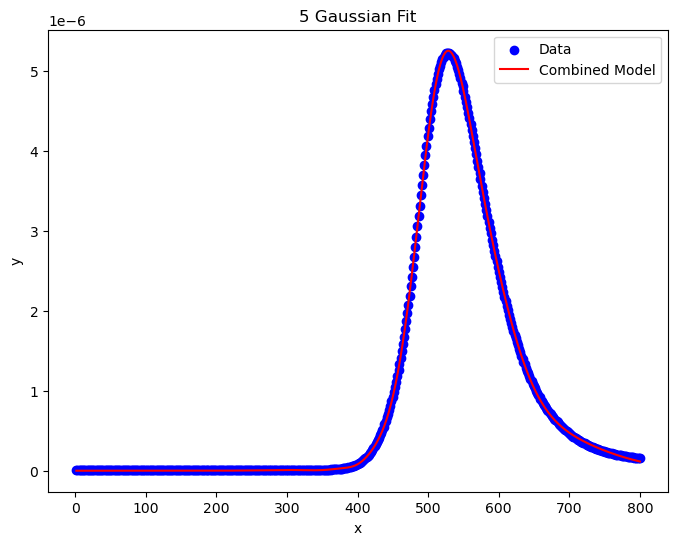

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


data = np.genfromtxt('./data2.dat')

# ガウス関数の定義
def gaussian(x, A, mu, sigma):
    return A * np.exp(- (x - mu)**2 / (2 * sigma**2))

# ログノーマル + 5つのガウスモデルの組み合わせ
def combined_model(x, A1, mu1, sigma1,
                      A2, mu2, sigma2,
                      A3, mu3, sigma3,
                      A4, mu4, sigma4,
                      A5, mu5, sigma5):
    """
    モデル関数: ログノーマル + 5つのガウス関数の線形結合
    """
    gauss1 = gaussian(x, A1, mu1, sigma1)
    gauss2 = gaussian(x, A2, mu2, sigma2)
    gauss3 = gaussian(x, A3, mu3, sigma3)
    gauss4 = gaussian(x, A4, mu4, sigma4)
    gauss5 = gaussian(x, A5, mu5, sigma5)
    
    return gauss1 + gauss2 + gauss3 + gauss4 + gauss5


xdata = np.array(data[:, 0])
ydata = np.array(data[:, 1])

# フィッティング
# 初期値の設定
p0 = [1, np.mean(xdata), 1,  # 1つ目のガウス
      1, np.mean(xdata)*1.2, 1,  # 2つ目のガウス
      1, np.mean(xdata)*1.4, 1,  # 3つ目のガウス
      1, np.mean(xdata)*1.6, 1,  # 4つ目のガウス
      1, np.mean(xdata)*0.8, 1]  # 5つ目のガウス

# curve_fitを用いて最適化
popt, pcov = curve_fit(combined_model, xdata, ydata, p0=p0)

# 最適化結果の表示
A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3, A4, mu4, sigma4, A5, mu5, sigma5 = popt
print("Fitted parameters:")
print(f"Gaussian 1: A = {A1}, mu = {mu1}, sigma = {sigma1}")
print(f"Gaussian 2: A = {A2}, mu = {mu2}, sigma = {sigma2}")
print(f"Gaussian 3: A = {A3}, mu = {mu3}, sigma = {sigma3}")
print(f"Gaussian 4: A = {A4}, mu = {mu4}, sigma = {sigma4}")
print(f"Gaussian 5: A = {A5}, mu = {mu5}, sigma = {sigma5}")

# プロット用のデータ生成
x_fit = np.linspace(min(xdata), max(xdata), 1000)
y_fit = combined_model(x_fit, *popt)

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(xdata, ydata, label="Data", color="blue")
plt.plot(x_fit, y_fit, label="Combined Model", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("5 Gaussian Fit")
plt.show()

In [50]:
# import numpy as np
# import matplotlib.pyplot as plt
# from lmfit.models import LognormalModel

# data = np.genfromtxt('./data.dat')
# plt.plot(data[:, 0], data[:, 1], label="By along X")

# # フィッティング
# popt, pcov = curve_fit(
#     fit_func,
#     data[:, 0],  # Xデータ
#     data[:, 1],  # Yデータ
#     p0=[0.000005, -600, 25, 50, 1150, 1200, -5, -5, 0]  # 初期推定値
# )

# popt

# plot_x = np.arange(-800, 800, 0.1)
# plt.plot(plot_x, fit_func(plot_x, popt[0], popt[1], popt[2], popt[3],
#          popt[4], popt[5], popt[6], popt[7], popt[8]), label='fit')

# plt.legend()